In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler
from scipy.stats import zscore, yeojohnson
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_roc_curve, accuracy_score, confusion_matrix, classification_report
from sklearn.utils import resample
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

import warnings
warnings.filterwarnings('ignore')

# Data Collection

In [ ]:
df = pd.read_csv(r'C:\Users\Shubham\Desktop\Projects\Evaluation\(2)_HR\WA_Fn-UseC_-HR-Employee-Attrition.csv')

# Data Understanding

In [ ]:
df.head() #Looking into the top 5 rows of the dataset

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
df.shape #Looking into the shape of the dataset

(1470, 35)

In [ ]:
df.columns #Calling all the column names of the dataset

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
df.describe() #Statistical representation of the data

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


From the above data we see that columns - 'Attrition', 'BusinessTravel', 'Department', 'Education', 'EducationField, 'Gender', 'JobInvolvement', 'JobLevel', 'MaritalStatus', 'Over18', 'OverTime' are all of classification type


In [ ]:
df.isnull().sum() #Checking for null values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

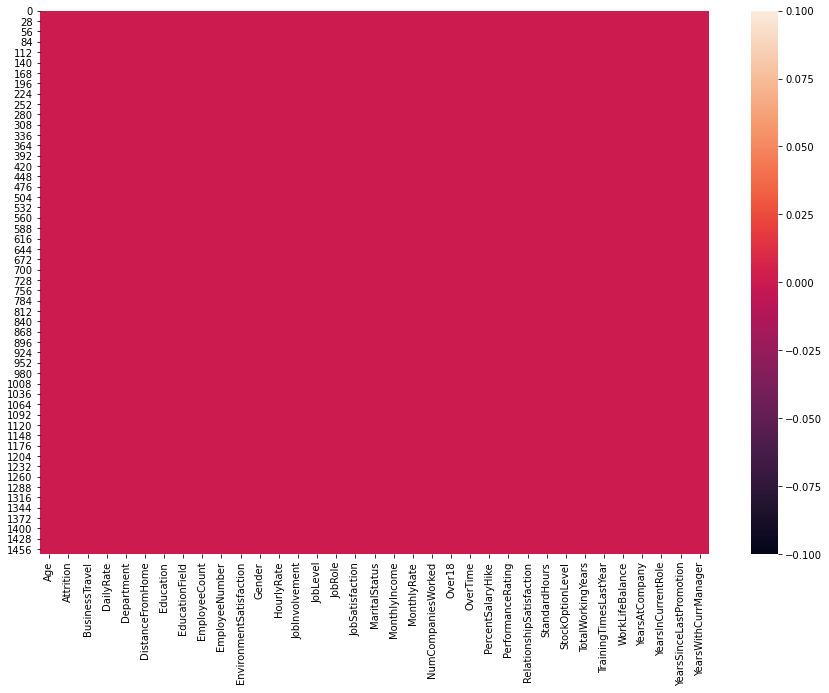

In [ ]:
#Visualization for null values
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull())
plt.show()

# Exploratory Data Analysis

Let us look into the target variable column first

<AxesSubplot:xlabel='Attrition', ylabel='count'>

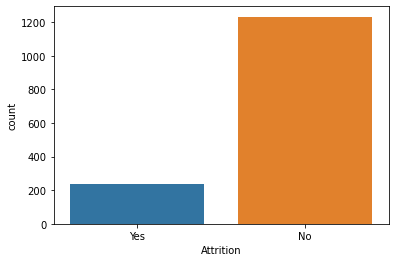

In [ ]:
sns.countplot(df['Attrition'])

In [ ]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

We can see that the class is highly imbalanced, let us balance it using up-balance in the later steps. Note we need to encode the data using label encoder.

In [ ]:
le = LabelEncoder()
df['Attrition'] = le.fit_transform(df['Attrition'])

In [ ]:
df['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

We have assigned
- yes : 1
- no  : 0

Looking at the feature columns seperately:

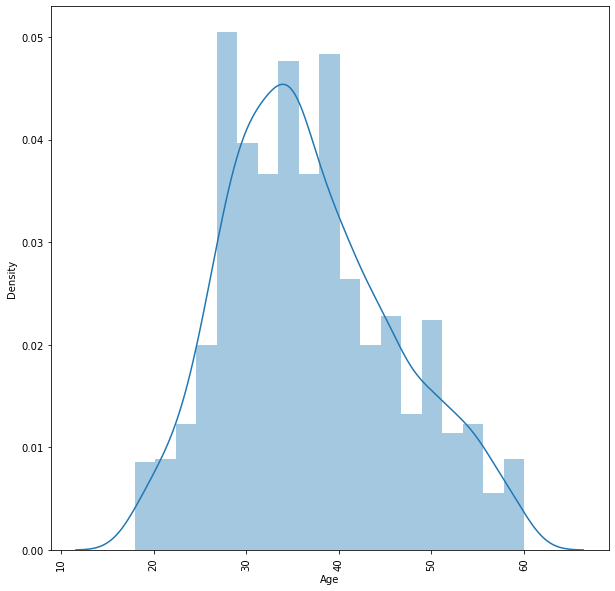

In [ ]:
#Density plot for the age column
plt.figure(figsize=(10,10))
sns.distplot(df['Age'])
plt.xticks(rotation=90)
plt.show()

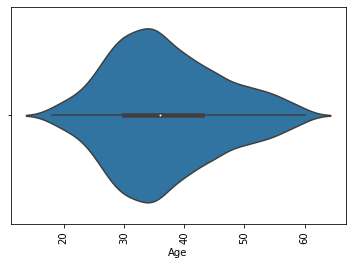

In [ ]:
#Violin plot for age
sns.violinplot(df['Age'])
plt.xticks(rotation=90)
plt.show()

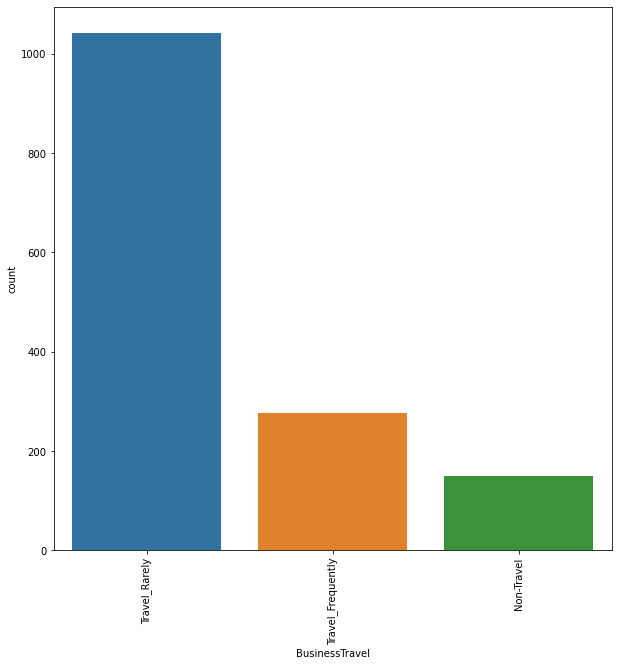

In [ ]:
#Count plot for the BusinessTravel column
plt.figure(figsize=(10,10))
sns.countplot(df['BusinessTravel'])
plt.xticks(rotation=90)
plt.show()

This column requires ordinal encoding to be suitable for the prediction model.

In [ ]:
c = df['BusinessTravel'].unique()
oe = OrdinalEncoder(categories=[c])
df['BusinessTravel'] = oe.fit_transform(df[['BusinessTravel']])

In [ ]:
df['BusinessTravel'].value_counts()

0.0    1043
1.0     277
2.0     150
Name: BusinessTravel, dtype: int64

We have assigned
- Travel_Rarely     : 0.0
- Travel_Frequently : 1.0
- Non-Travel        : 2.0

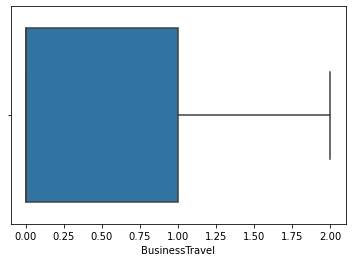

In [ ]:
#Box plot for BusinessTravel
sns.boxplot(df['BusinessTravel'])
plt.show()

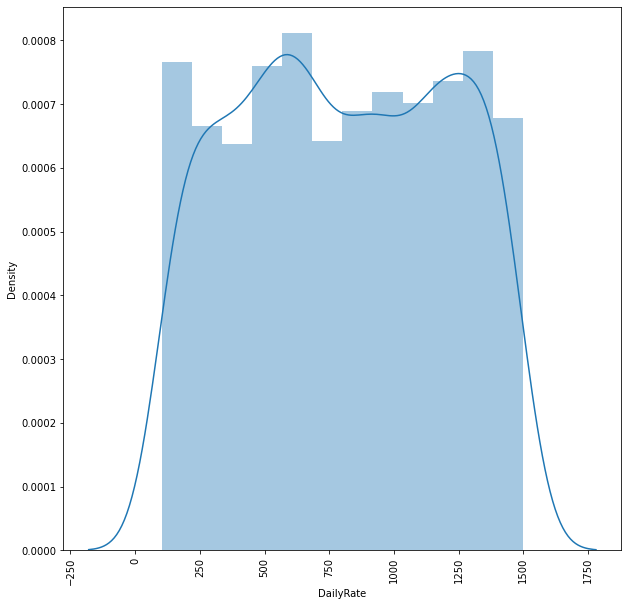

In [ ]:
#Density plot for the DailyRate column
plt.figure(figsize=(10,10))
sns.distplot(df['DailyRate'])
plt.xticks(rotation=90)
plt.show()

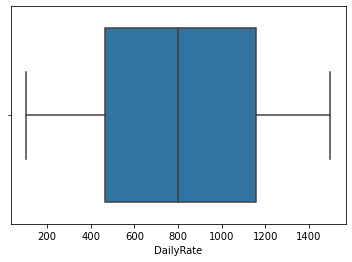

In [ ]:
#Box plot for DailyRate
sns.boxplot(df['DailyRate'])
plt.show()

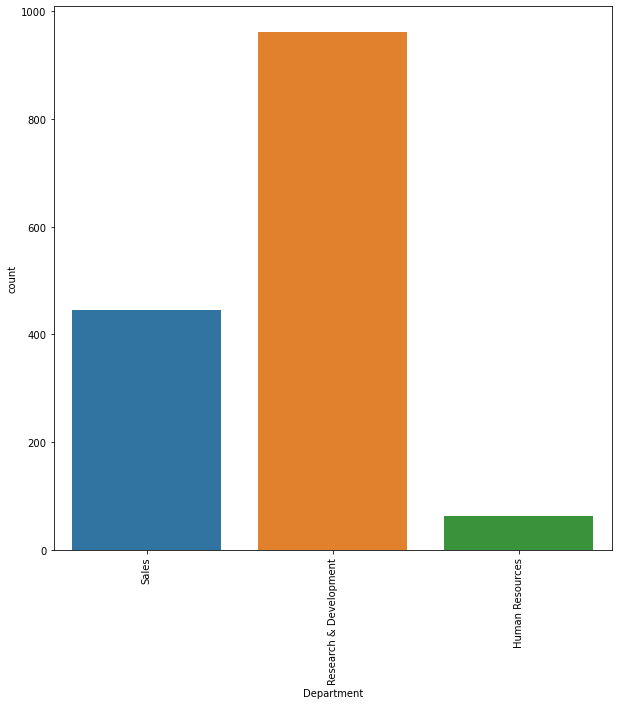

In [ ]:
#Count plot for the Department column
plt.figure(figsize=(10,10))
sns.countplot(df['Department'])
plt.xticks(rotation=90)
plt.show()

Let us encode it too using Ordinal Encoder

In [ ]:
c = df['Department'].unique()
oe = OrdinalEncoder(categories=[c])
df['Department'] = oe.fit_transform(df[['Department']])

We have assigned
- Sales                  : 0.0
- Research & Development : 1.0
- Human Resources        : 2.0

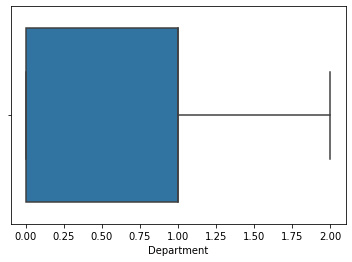

In [ ]:
#Box plot for Department
sns.boxplot(df['Department'])
plt.show()

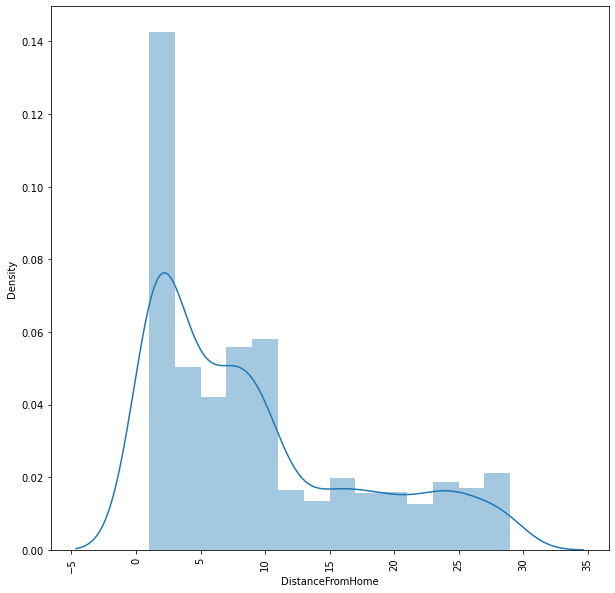

In [ ]:
#Density plot for the DistanceFromHome column
plt.figure(figsize=(10,10))
sns.distplot(df['DistanceFromHome'])
plt.xticks(rotation=90)
plt.show()

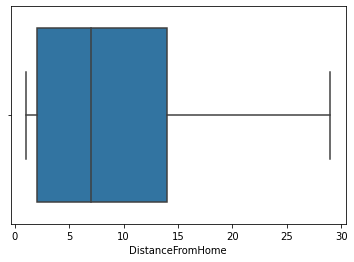

In [ ]:
#Box plot for DistanceFromHome
sns.boxplot(df['DistanceFromHome'])
plt.show()

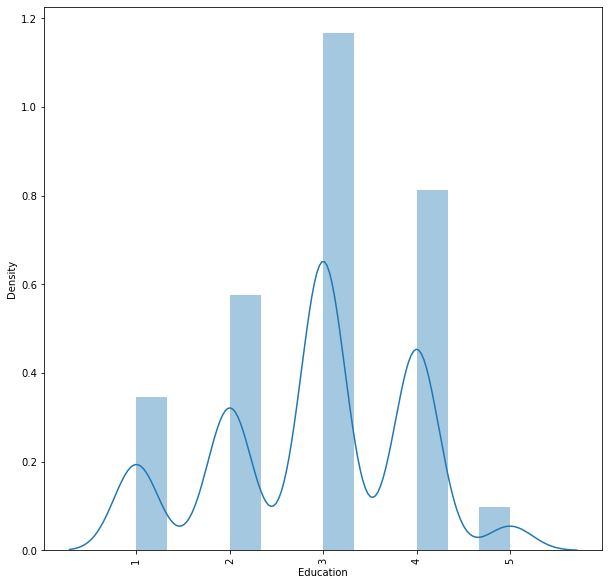

In [ ]:
#Density plot for the Education column
plt.figure(figsize=(10,10))
sns.distplot(df['Education'])
plt.xticks(rotation=90)
plt.show()

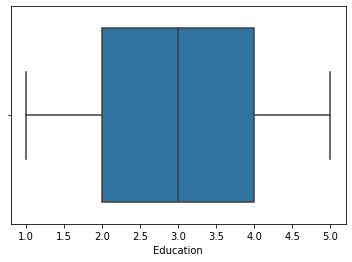

In [ ]:
#Box plot for Education
sns.boxplot(df['Education'])
plt.show()

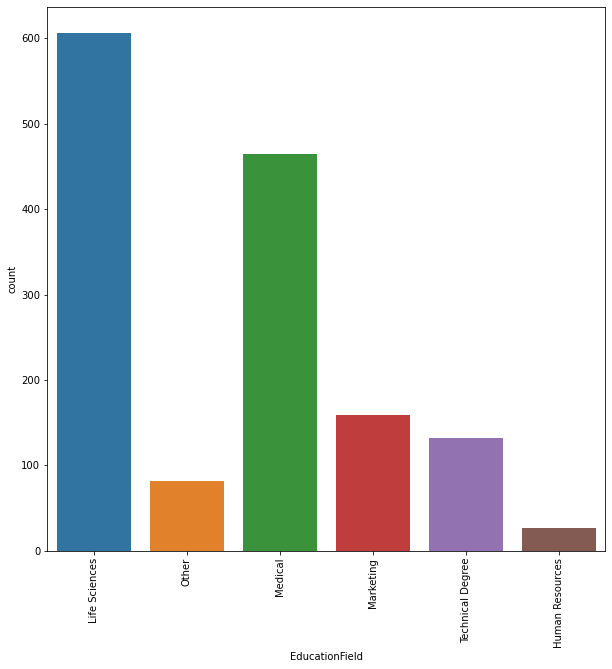

In [ ]:
#Count plot for the EducationField column
plt.figure(figsize=(10,10))
sns.countplot(df['EducationField'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

Let us encode it too using Ordinal Encoder

In [ ]:
c = df['EducationField'].unique()
oe = OrdinalEncoder(categories=[c])
df['EducationField'] = oe.fit_transform(df[['EducationField']])

In [ ]:
df['EducationField'].value_counts()

0.0    606
2.0    464
3.0    159
4.0    132
1.0     82
5.0     27
Name: EducationField, dtype: int64

The assigned are:-
- 'Life Sciences'   : 0.0
- 'Other'           : 1.0
- 'Medical'         : 2.0
- 'Marketing'       : 3.0
- 'Technical Degree': 4.0
- 'Human Resources' : 5.0

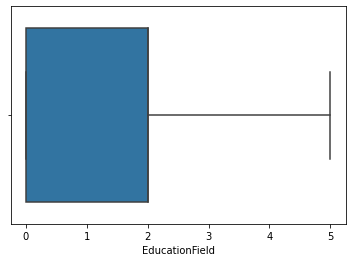

In [ ]:
#Box plot for EducationField
sns.boxplot(df['EducationField'])
plt.show()

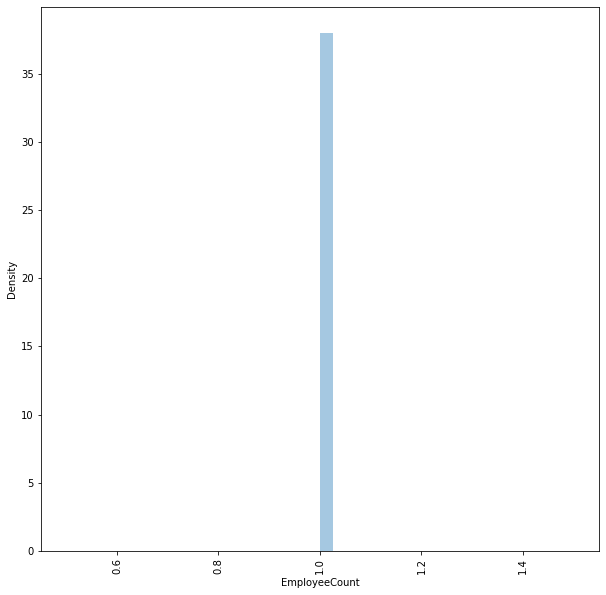

In [ ]:
#Density plot for the EmployeeCount column
plt.figure(figsize=(10,10))
sns.distplot(df['EmployeeCount'])
plt.xticks(rotation=90)
plt.show()

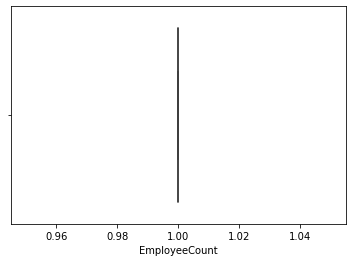

In [ ]:
#Box plot for EmployeeCount
sns.boxplot(df['EmployeeCount'])
plt.show()

This above data tells us each row is for a single person, and we may drop this column for training purposes.

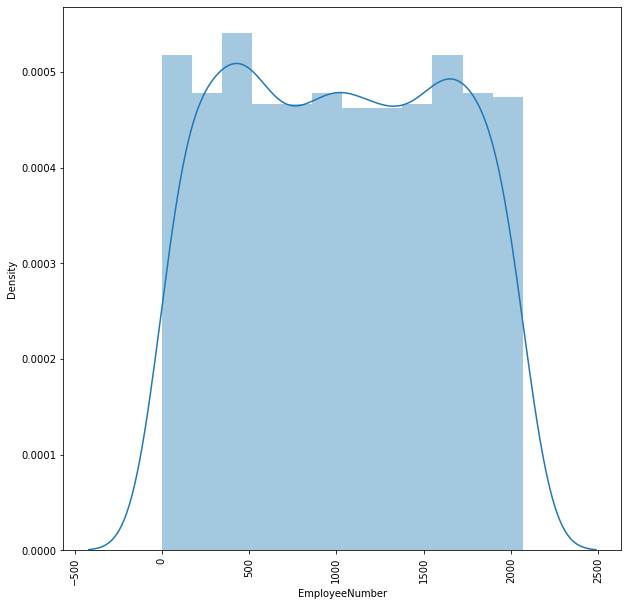

In [ ]:
#Density plot for the EmployeeNumber column
plt.figure(figsize=(10,10))
sns.distplot(df['EmployeeNumber'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['EmployeeNumber'].value_counts()

2048    1
1368    1
1364    1
1363    1
1362    1
       ..
648     1
647     1
645     1
644     1
2046    1
Name: EmployeeNumber, Length: 1470, dtype: int64

This above data tells us each row is for a single person identification, and we may drop this column for training purposes as the employee number should not attribute to the target column.

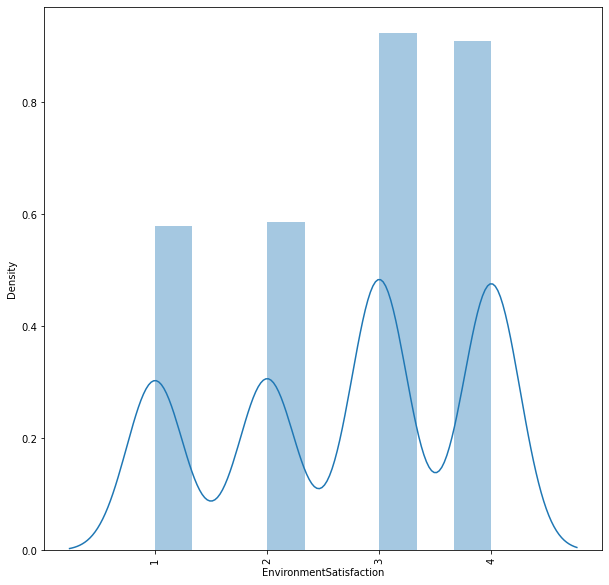

In [ ]:
#Density plot for the EnvironmentSatisfaction column
plt.figure(figsize=(10,10))
sns.distplot(df['EnvironmentSatisfaction'])
plt.xticks(rotation=90)
plt.show()

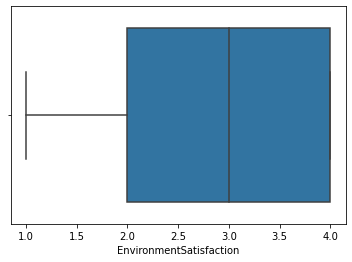

In [ ]:
#Box plot for EnvironmentSatisfaction
sns.boxplot(df['EnvironmentSatisfaction'])
plt.show()

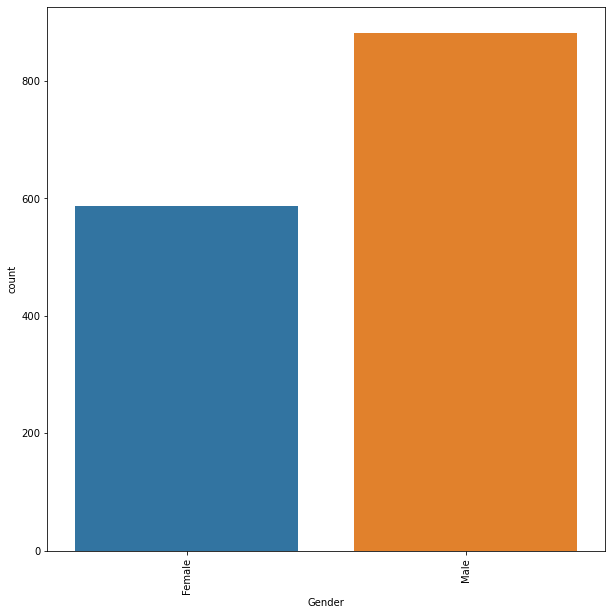

In [ ]:
#Count plot for the Gender column
plt.figure(figsize=(10,10))
sns.countplot(df['Gender'])
plt.xticks(rotation=90)
plt.show()

We can transform this data using label encoder.

In [ ]:
df['Gender'] = le.fit_transform(df['Gender'])

In [ ]:
df['Gender'].value_counts()

1    882
0    588
Name: Gender, dtype: int64

We have assigned

- Female : 0.0
- Male   : 1.0

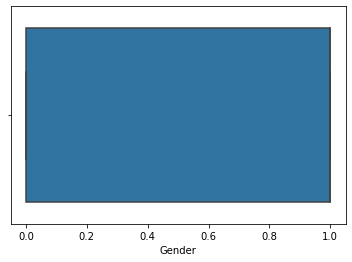

In [ ]:
#Box plot for Gender
sns.boxplot(df['Gender'])
plt.show()

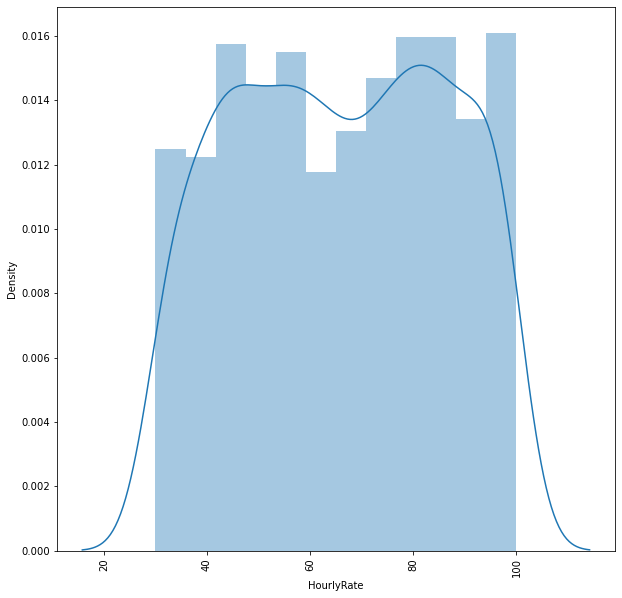

In [ ]:
#Density plot for the HourlyRate column
plt.figure(figsize=(10,10))
sns.distplot(df['HourlyRate'])
plt.xticks(rotation=90)
plt.show()

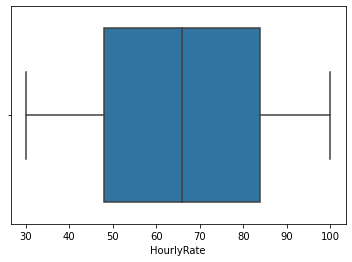

In [ ]:
#Box plot for HourlyRate
sns.boxplot(df['HourlyRate'])
plt.show()

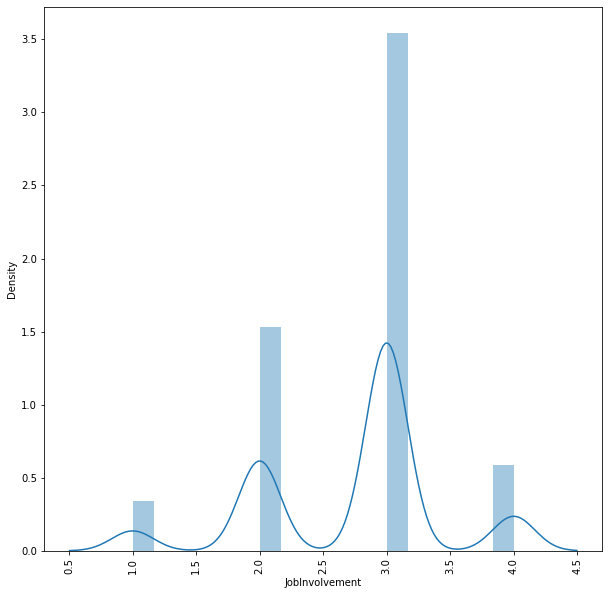

In [ ]:
#Density plot for the JobInvolvement column
plt.figure(figsize=(10,10))
sns.distplot(df['JobInvolvement'])
plt.xticks(rotation=90)
plt.show()

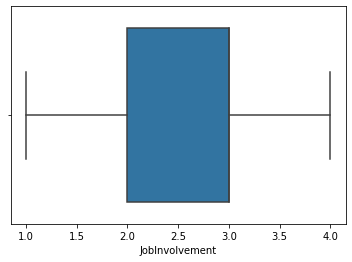

In [ ]:
#Box plot for JobInvolvement
sns.boxplot(df['JobInvolvement'])
plt.show()

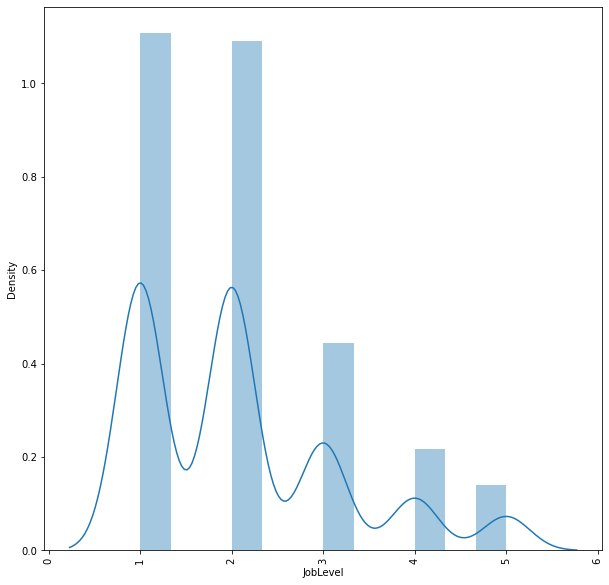

In [ ]:
#Density plot for the JobLevel column
plt.figure(figsize=(10,10))
sns.distplot(df['JobLevel'])
plt.xticks(rotation=90)
plt.show()

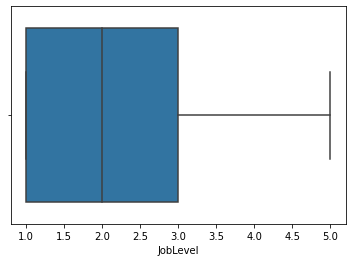

In [ ]:
#Box plot for JobLevel
sns.boxplot(df['JobLevel'])
plt.show()

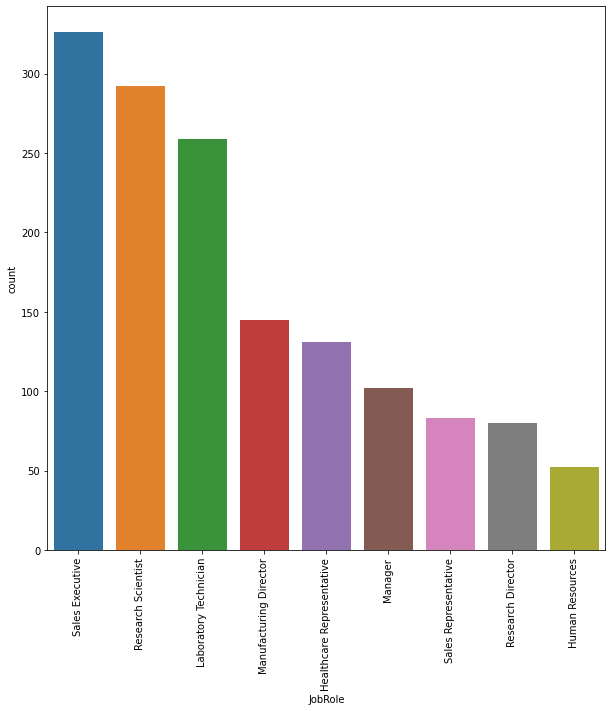

In [ ]:
#Count plot for the JobRole column
plt.figure(figsize=(10,10))
sns.countplot(df['JobRole'])
plt.xticks(rotation=90)
plt.show()

We will transform the data using Ordinary Encoder

In [ ]:
df['JobRole'].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

In [ ]:
c = df['JobRole'].unique()
oe = OrdinalEncoder(categories=[c])
df['JobRole'] = oe.fit_transform(df[['JobRole']])

In [ ]:
df['JobRole'].value_counts()

0.0    326
1.0    292
2.0    259
3.0    145
4.0    131
5.0    102
6.0     83
7.0     80
8.0     52
Name: JobRole, dtype: int64

We assigned:
- 'Sales Executive'            : 0.0
- 'Research Scientist'         : 1.0
- 'Laboratory Technician'      : 2.0
- 'Manufacturing Director'     : 3.0
- 'Healthcare Representative'  : 4.0
- 'Manager'                    : 5.0
- 'Sales Representative'       : 6.0
- 'Research Director'          : 7.0
- 'Human Resources'            : 8.0

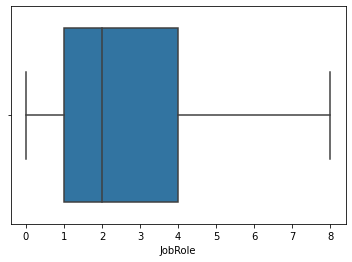

In [ ]:
#Box plot for JobRole
sns.boxplot(df['JobRole'])
plt.show()

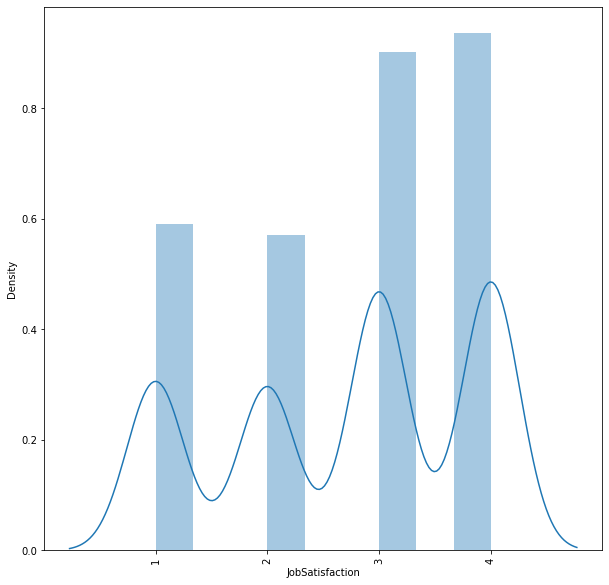

In [ ]:
#Density plot for the JobSatisfaction column
plt.figure(figsize=(10,10))
sns.distplot(df['JobSatisfaction'])
plt.xticks(rotation=90)
plt.show()

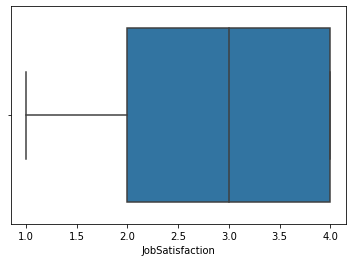

In [ ]:
#Box plot for JobRole
sns.boxplot(df['JobSatisfaction'])
plt.show()

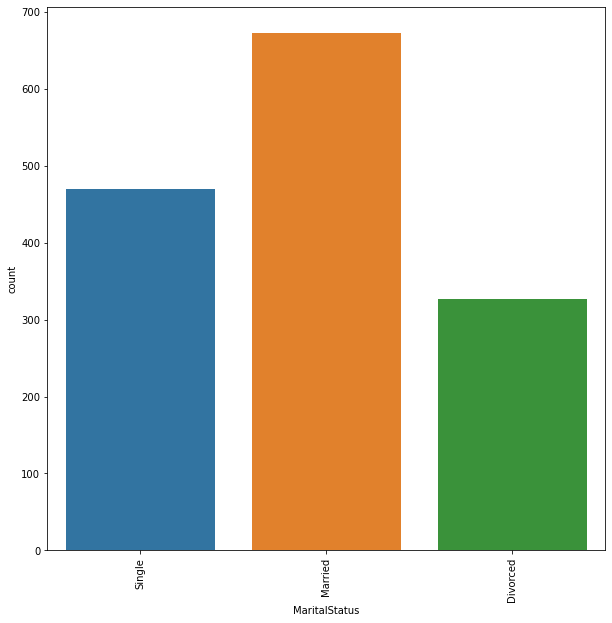

In [ ]:
#Count plot for the MaritalStatus column
plt.figure(figsize=(10,10))
sns.countplot(df['MaritalStatus'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
df['MaritalStatus'].value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

We transform using Ordinal Encoder

In [ ]:
c = df['MaritalStatus'].unique()
oe = OrdinalEncoder(categories=[c])
df['MaritalStatus'] = oe.fit_transform(df[['MaritalStatus']])

In [ ]:
df['MaritalStatus'].value_counts()

1.0    673
0.0    470
2.0    327
Name: MaritalStatus, dtype: int64

We assigned:
- Single  : 0.0
- Married : 1.0
- Divorced: 2.0

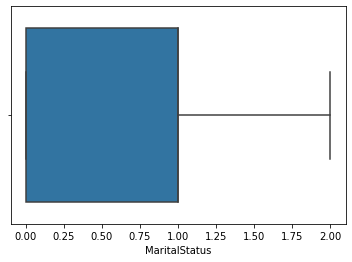

In [ ]:
#Box plot for MaritalStatus
sns.boxplot(df['MaritalStatus'])
plt.show()

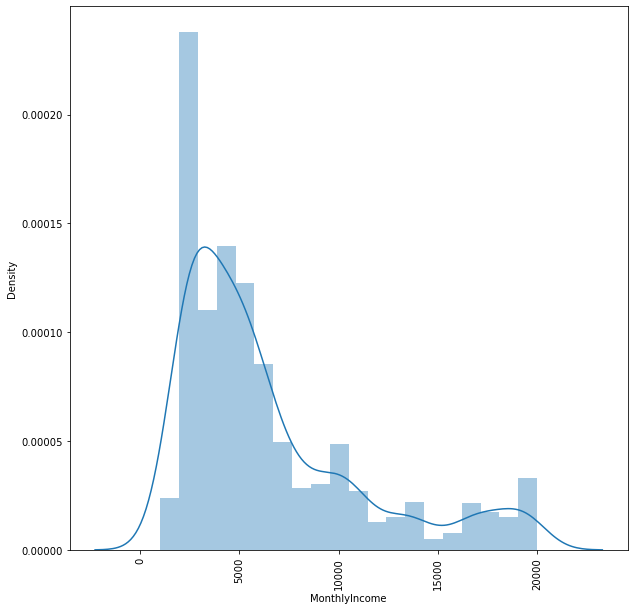

In [ ]:
#Density plot for the MonthlyIncome column
plt.figure(figsize=(10,10))
sns.distplot(df['MonthlyIncome'])
plt.xticks(rotation=90)
plt.show()

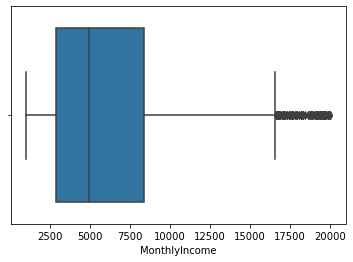

In [ ]:
#Box plot for MonthlyIncome
sns.boxplot(df['MonthlyIncome'])
plt.show()

This column shows a presence of outliers, we will reduce it in the later stages

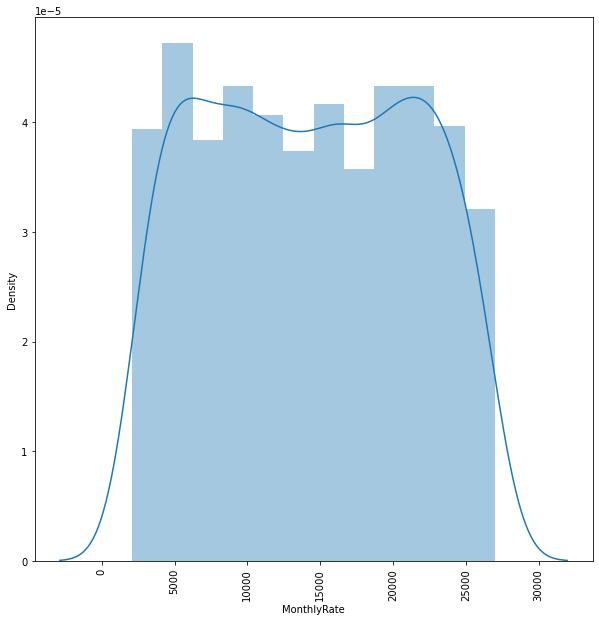

In [ ]:
#Density plot for the MonthlyRate column
plt.figure(figsize=(10,10))
sns.distplot(df['MonthlyRate'])
plt.xticks(rotation=90)
plt.show()

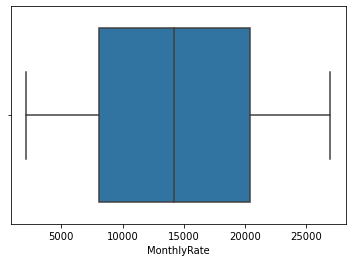

In [ ]:
#Box plot for MonthlyRate
sns.boxplot(df['MonthlyRate'])
plt.show()

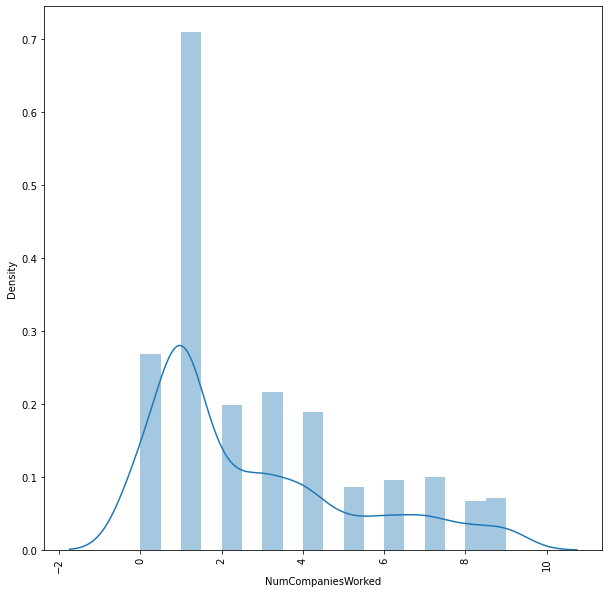

In [ ]:
#Density plot for the NumCompaniesWorked column
plt.figure(figsize=(10,10))
sns.distplot(df['NumCompaniesWorked'])
plt.xticks(rotation=90)
plt.show()

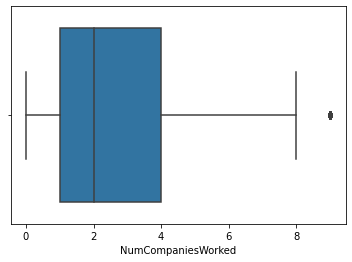

In [ ]:
#Box plot for NumCompaniesWorked
sns.boxplot(df['NumCompaniesWorked'])
plt.show()

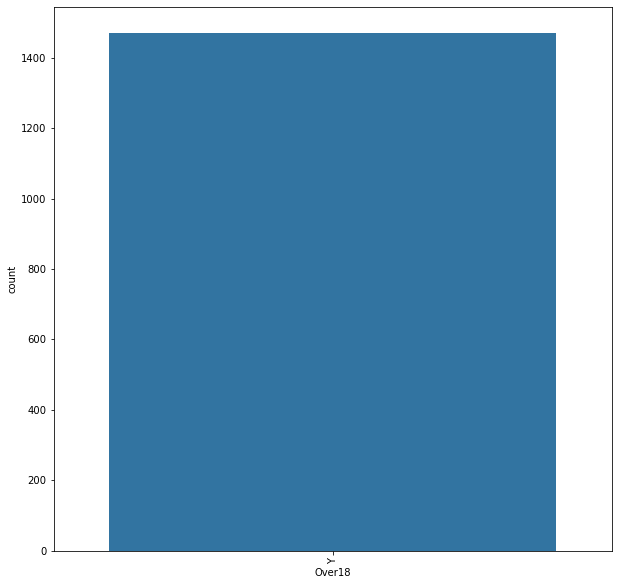

In [ ]:
#Count plot for the Over18 column
plt.figure(figsize=(10,10))
sns.countplot(df['Over18'])
plt.xticks(rotation=90)
plt.show()

Since all are over 18 we can drop this column too later

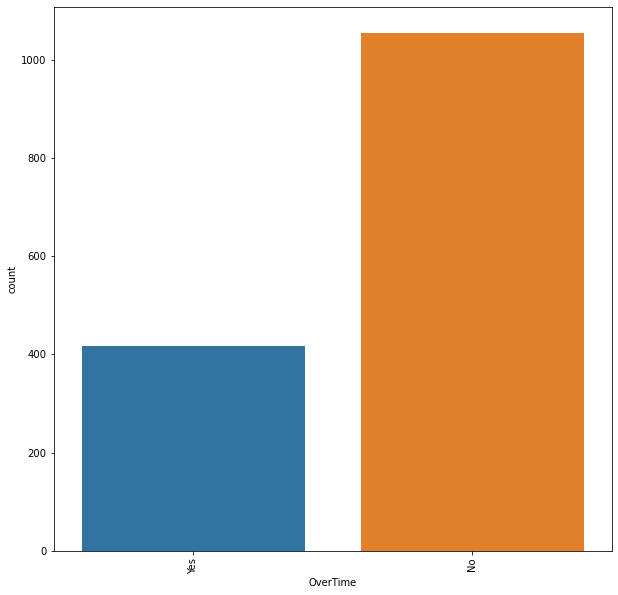

In [ ]:
#Count plot for the OverTime column
plt.figure(figsize=(10,10))
sns.countplot(df['OverTime'])
plt.xticks(rotation=90)
plt.show()

We can transform this using label encoder

In [ ]:
df['OverTime'] = le.fit_transform(df['OverTime'])

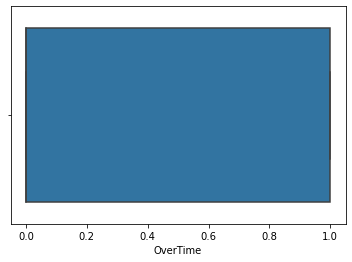

In [ ]:
#Box plot for OverTime
sns.boxplot(df['OverTime'])
plt.show()

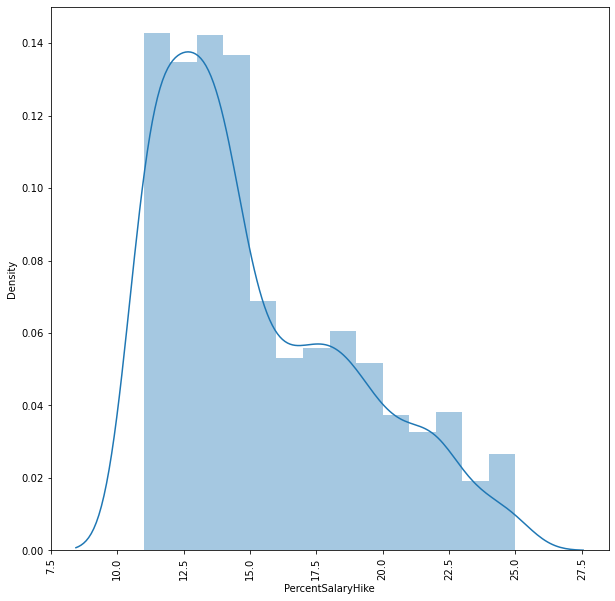

In [ ]:
#Density plot for the PercentSalaryHike column
plt.figure(figsize=(10,10))
sns.distplot(df['PercentSalaryHike'])
plt.xticks(rotation=90)
plt.show()

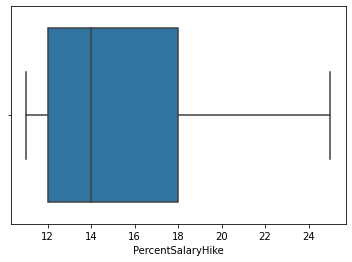

In [ ]:
#Box plot for PercentSalaryHike
sns.boxplot(df['PercentSalaryHike'])
plt.show()

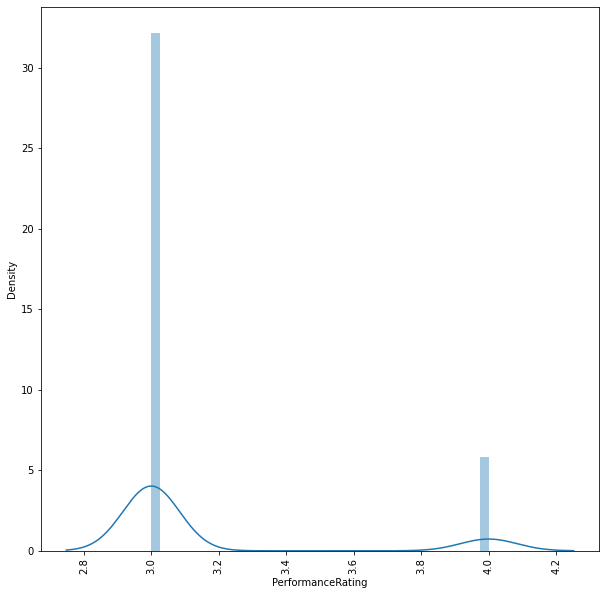

In [ ]:
#Density plot for the PerformanceRating column
plt.figure(figsize=(10,10))
sns.distplot(df['PerformanceRating'])
plt.xticks(rotation=90)
plt.show()

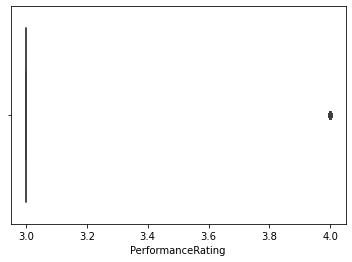

In [ ]:
#Box plot for PerformanceRating
sns.boxplot(df['PerformanceRating'])
plt.show()

This shows rating 4 as an outlier however, it is an essential outlier and we keep it

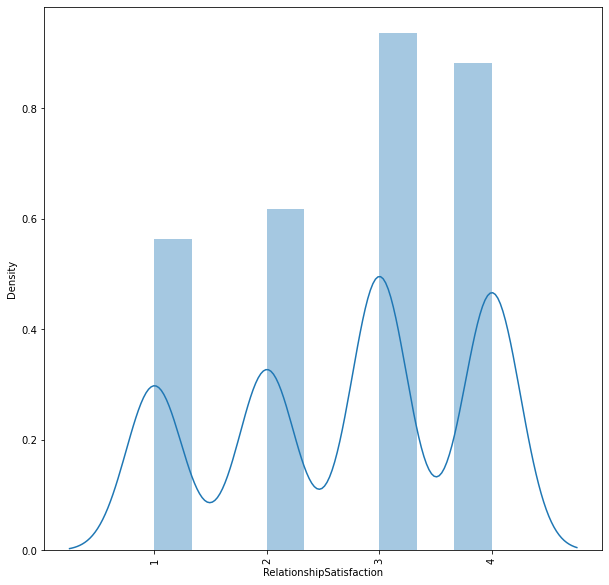

In [ ]:
#Density plot for the RelationshipSatisfaction column
plt.figure(figsize=(10,10))
sns.distplot(df['RelationshipSatisfaction'])
plt.xticks(rotation=90)
plt.show()

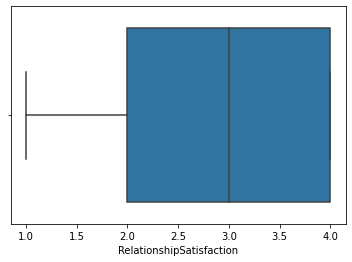

In [ ]:
#Box plot for RelationshipSatisfaction
sns.boxplot(df['RelationshipSatisfaction'])
plt.show()

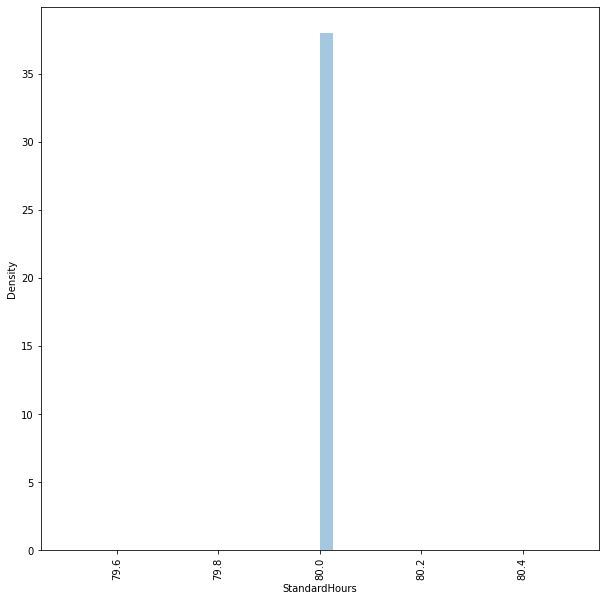

In [ ]:
#Density plot for the StandardHours column
plt.figure(figsize=(10,10))
sns.distplot(df['StandardHours'])
plt.xticks(rotation=90)
plt.show()

Since standard hours is same for everybody, we shall drop this column too later

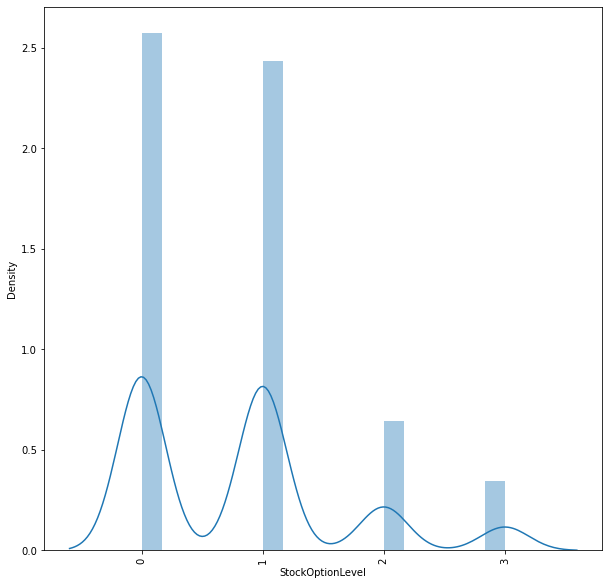

In [ ]:
#Density plot for the StockOptionLevel column
plt.figure(figsize=(10,10))
sns.distplot(df['StockOptionLevel'])
plt.xticks(rotation=90)
plt.show()

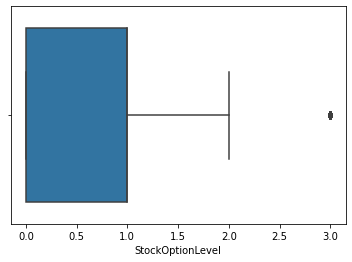

In [ ]:
#Box plot for StockOptionLevel
sns.boxplot(df['StockOptionLevel'])
plt.show()

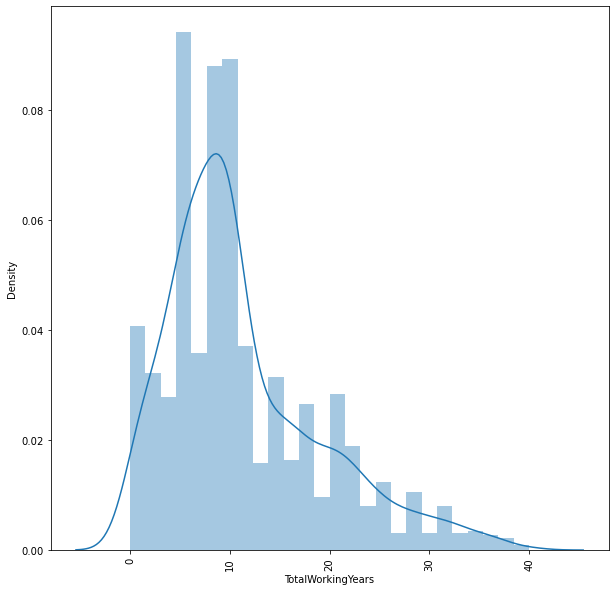

In [ ]:
#Density plot for the TotalWorkingYears column
plt.figure(figsize=(10,10))
sns.distplot(df['TotalWorkingYears'])
plt.xticks(rotation=90)
plt.show()

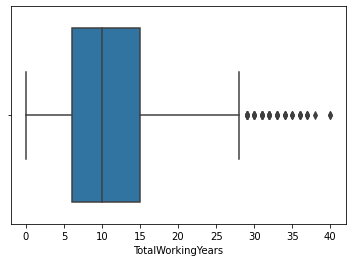

In [ ]:
#Box plot for TotalWorkingYears
sns.boxplot(df['TotalWorkingYears'])
plt.show()

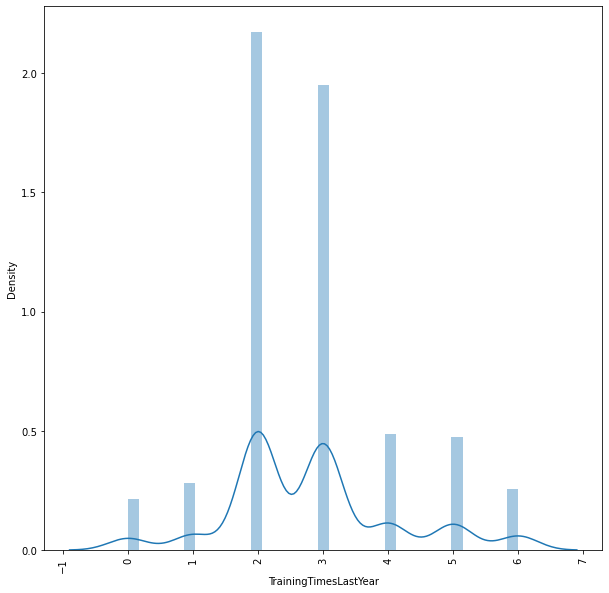

In [ ]:
#Density plot for the TrainingTimesLastYear column
plt.figure(figsize=(10,10))
sns.distplot(df['TrainingTimesLastYear'])
plt.xticks(rotation=90)
plt.show()

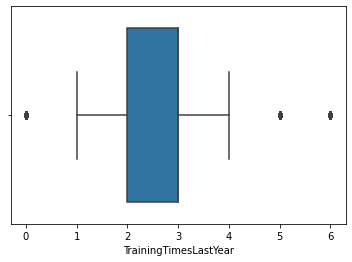

In [ ]:
#Box plot for TrainingTimesLastYear
sns.boxplot(df['TrainingTimesLastYear'])
plt.show()

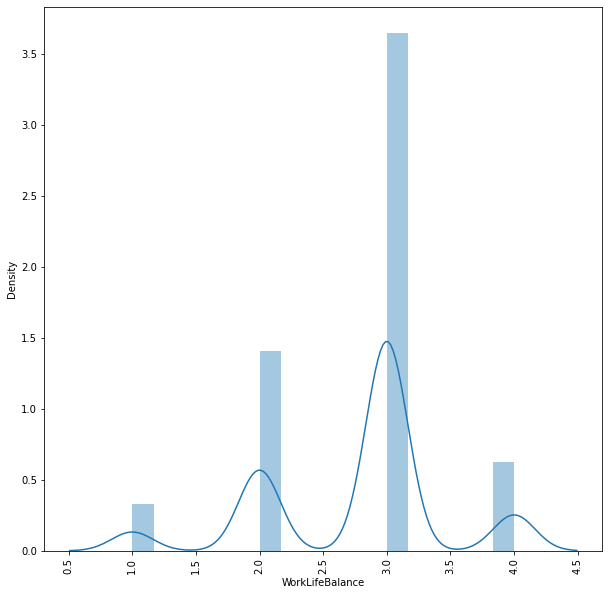

In [ ]:
#Density plot for the WorkLifeBalance column
plt.figure(figsize=(10,10))
sns.distplot(df['WorkLifeBalance'])
plt.xticks(rotation=90)
plt.show()

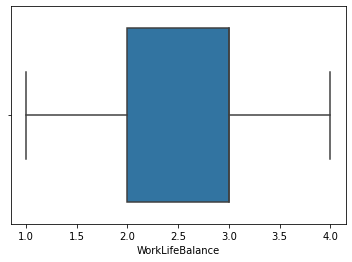

In [ ]:
#Box plot for WorkLifeBalance
sns.boxplot(df['WorkLifeBalance'])
plt.show()

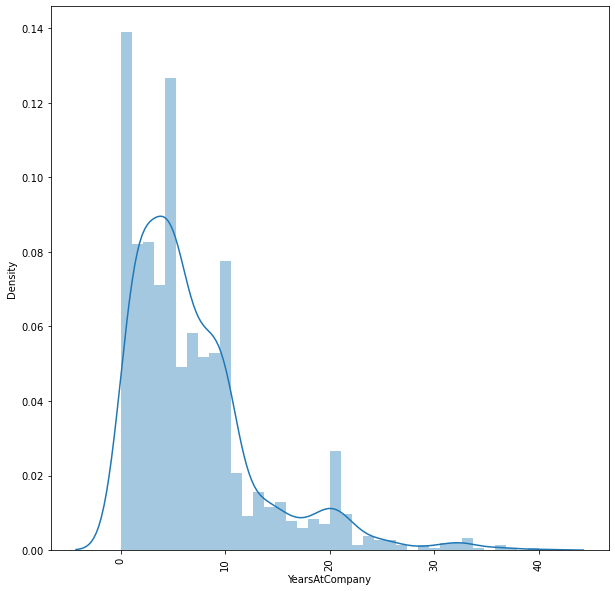

In [ ]:
#Density plot for the YearsAtCompany column
plt.figure(figsize=(10,10))
sns.distplot(df['YearsAtCompany'])
plt.xticks(rotation=90)
plt.show()

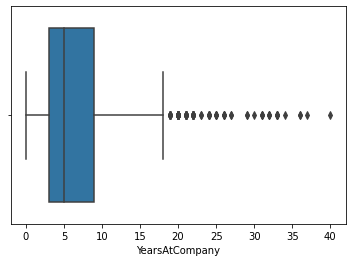

In [ ]:
#Box plot for YearsAtCompany
sns.boxplot(df['YearsAtCompany'])
plt.show()

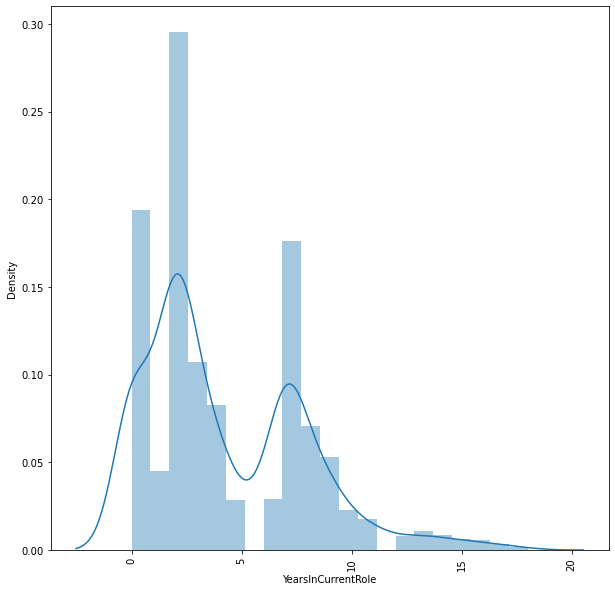

In [ ]:
#Density plot for the YearsInCurrentRole column
plt.figure(figsize=(10,10))
sns.distplot(df['YearsInCurrentRole'])
plt.xticks(rotation=90)
plt.show()

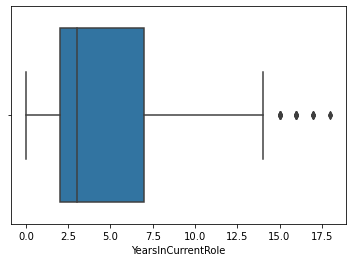

In [ ]:
#Box plot for YearsInCurrentRole
sns.boxplot(df['YearsInCurrentRole'])
plt.show()

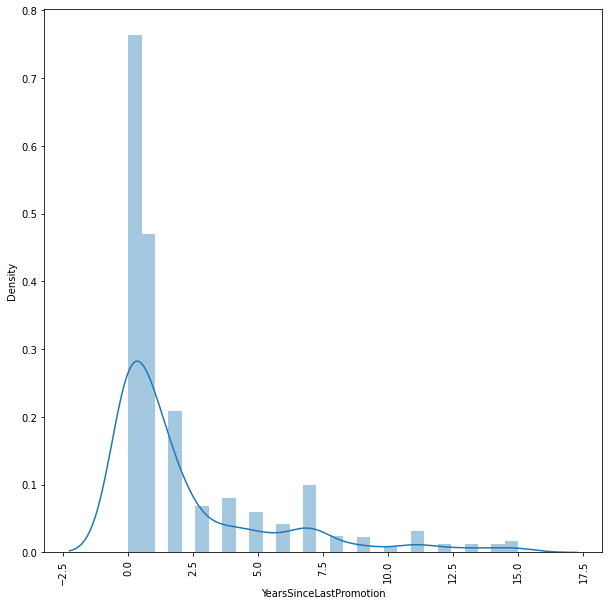

In [ ]:
#Density plot for the YearsSinceLastPromotion column
plt.figure(figsize=(10,10))
sns.distplot(df['YearsSinceLastPromotion'])
plt.xticks(rotation=90)
plt.show()

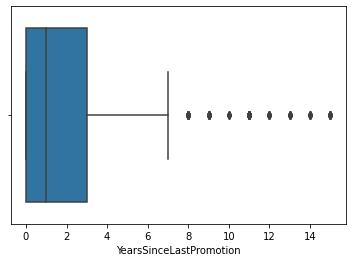

In [ ]:
#Box plot for YearsSinceLastPromotion
sns.boxplot(df['YearsSinceLastPromotion'])
plt.show()

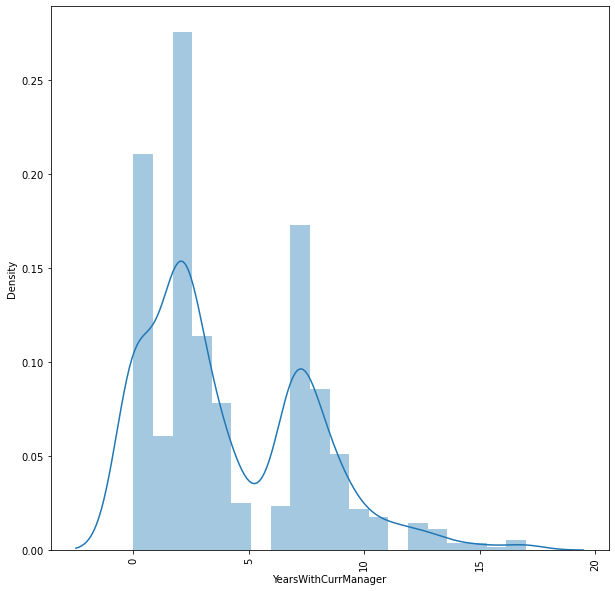

In [ ]:
#Density plot for the YearsWithCurrManager column
plt.figure(figsize=(10,10))
sns.distplot(df['YearsWithCurrManager'])
plt.xticks(rotation=90)
plt.show()

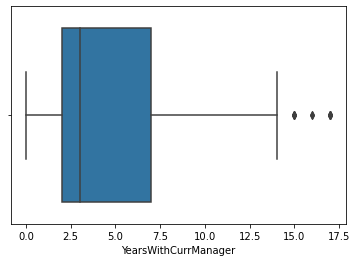

In [ ]:
#Box plot for YearsWithCurrManager
sns.boxplot(df['YearsWithCurrManager'])
plt.show()

# Correlation

Now, since all the data has been transformed into numeric values. Let us check for the correlation to the target column

In [ ]:
df.corr() #Correlation matrix

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,-0.024751,0.010661,0.031882,-0.001686,0.208034,-0.007192,NaN,-0.010145,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.000074,-0.056652,-0.063991,0.077924,-0.031373,0.075437,NaN,-0.010577,...,-0.045872,NaN,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,-0.024751,-0.000074,1.000000,0.004086,-0.009044,0.024469,-0.000757,-0.017799,NaN,0.015578,...,0.035986,NaN,0.016727,-0.034226,-0.015240,0.011256,0.014575,0.011497,0.032591,0.022636
DailyRate,0.010661,-0.056652,0.004086,1.000000,-0.007109,-0.004985,-0.016806,-0.015942,NaN,-0.050990,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,0.031882,-0.063991,-0.009044,-0.007109,1.000000,-0.017225,-0.007996,-0.057499,NaN,0.010895,...,0.022414,NaN,0.012193,0.015762,-0.036875,-0.026383,-0.022920,-0.056315,-0.040061,-0.034282
DistanceFromHome,-0.001686,0.077924,0.024469,-0.004985,-0.017225,1.000000,0.021042,0.020004,NaN,0.032916,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.000757,-0.016806,-0.007996,0.021042,1.000000,-0.002687,NaN,0.042070,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.007192,0.075437,-0.017799,-0.015942,-0.057499,0.020004,-0.002687,1.000000,NaN,0.007922,...,0.022723,NaN,0.020179,-0.002329,0.014553,0.033896,0.003061,-0.007728,0.004327,-0.001829
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.010577,0.015578,-0.050990,0.010895,0.032916,0.042070,0.007922,NaN,1.000000,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197


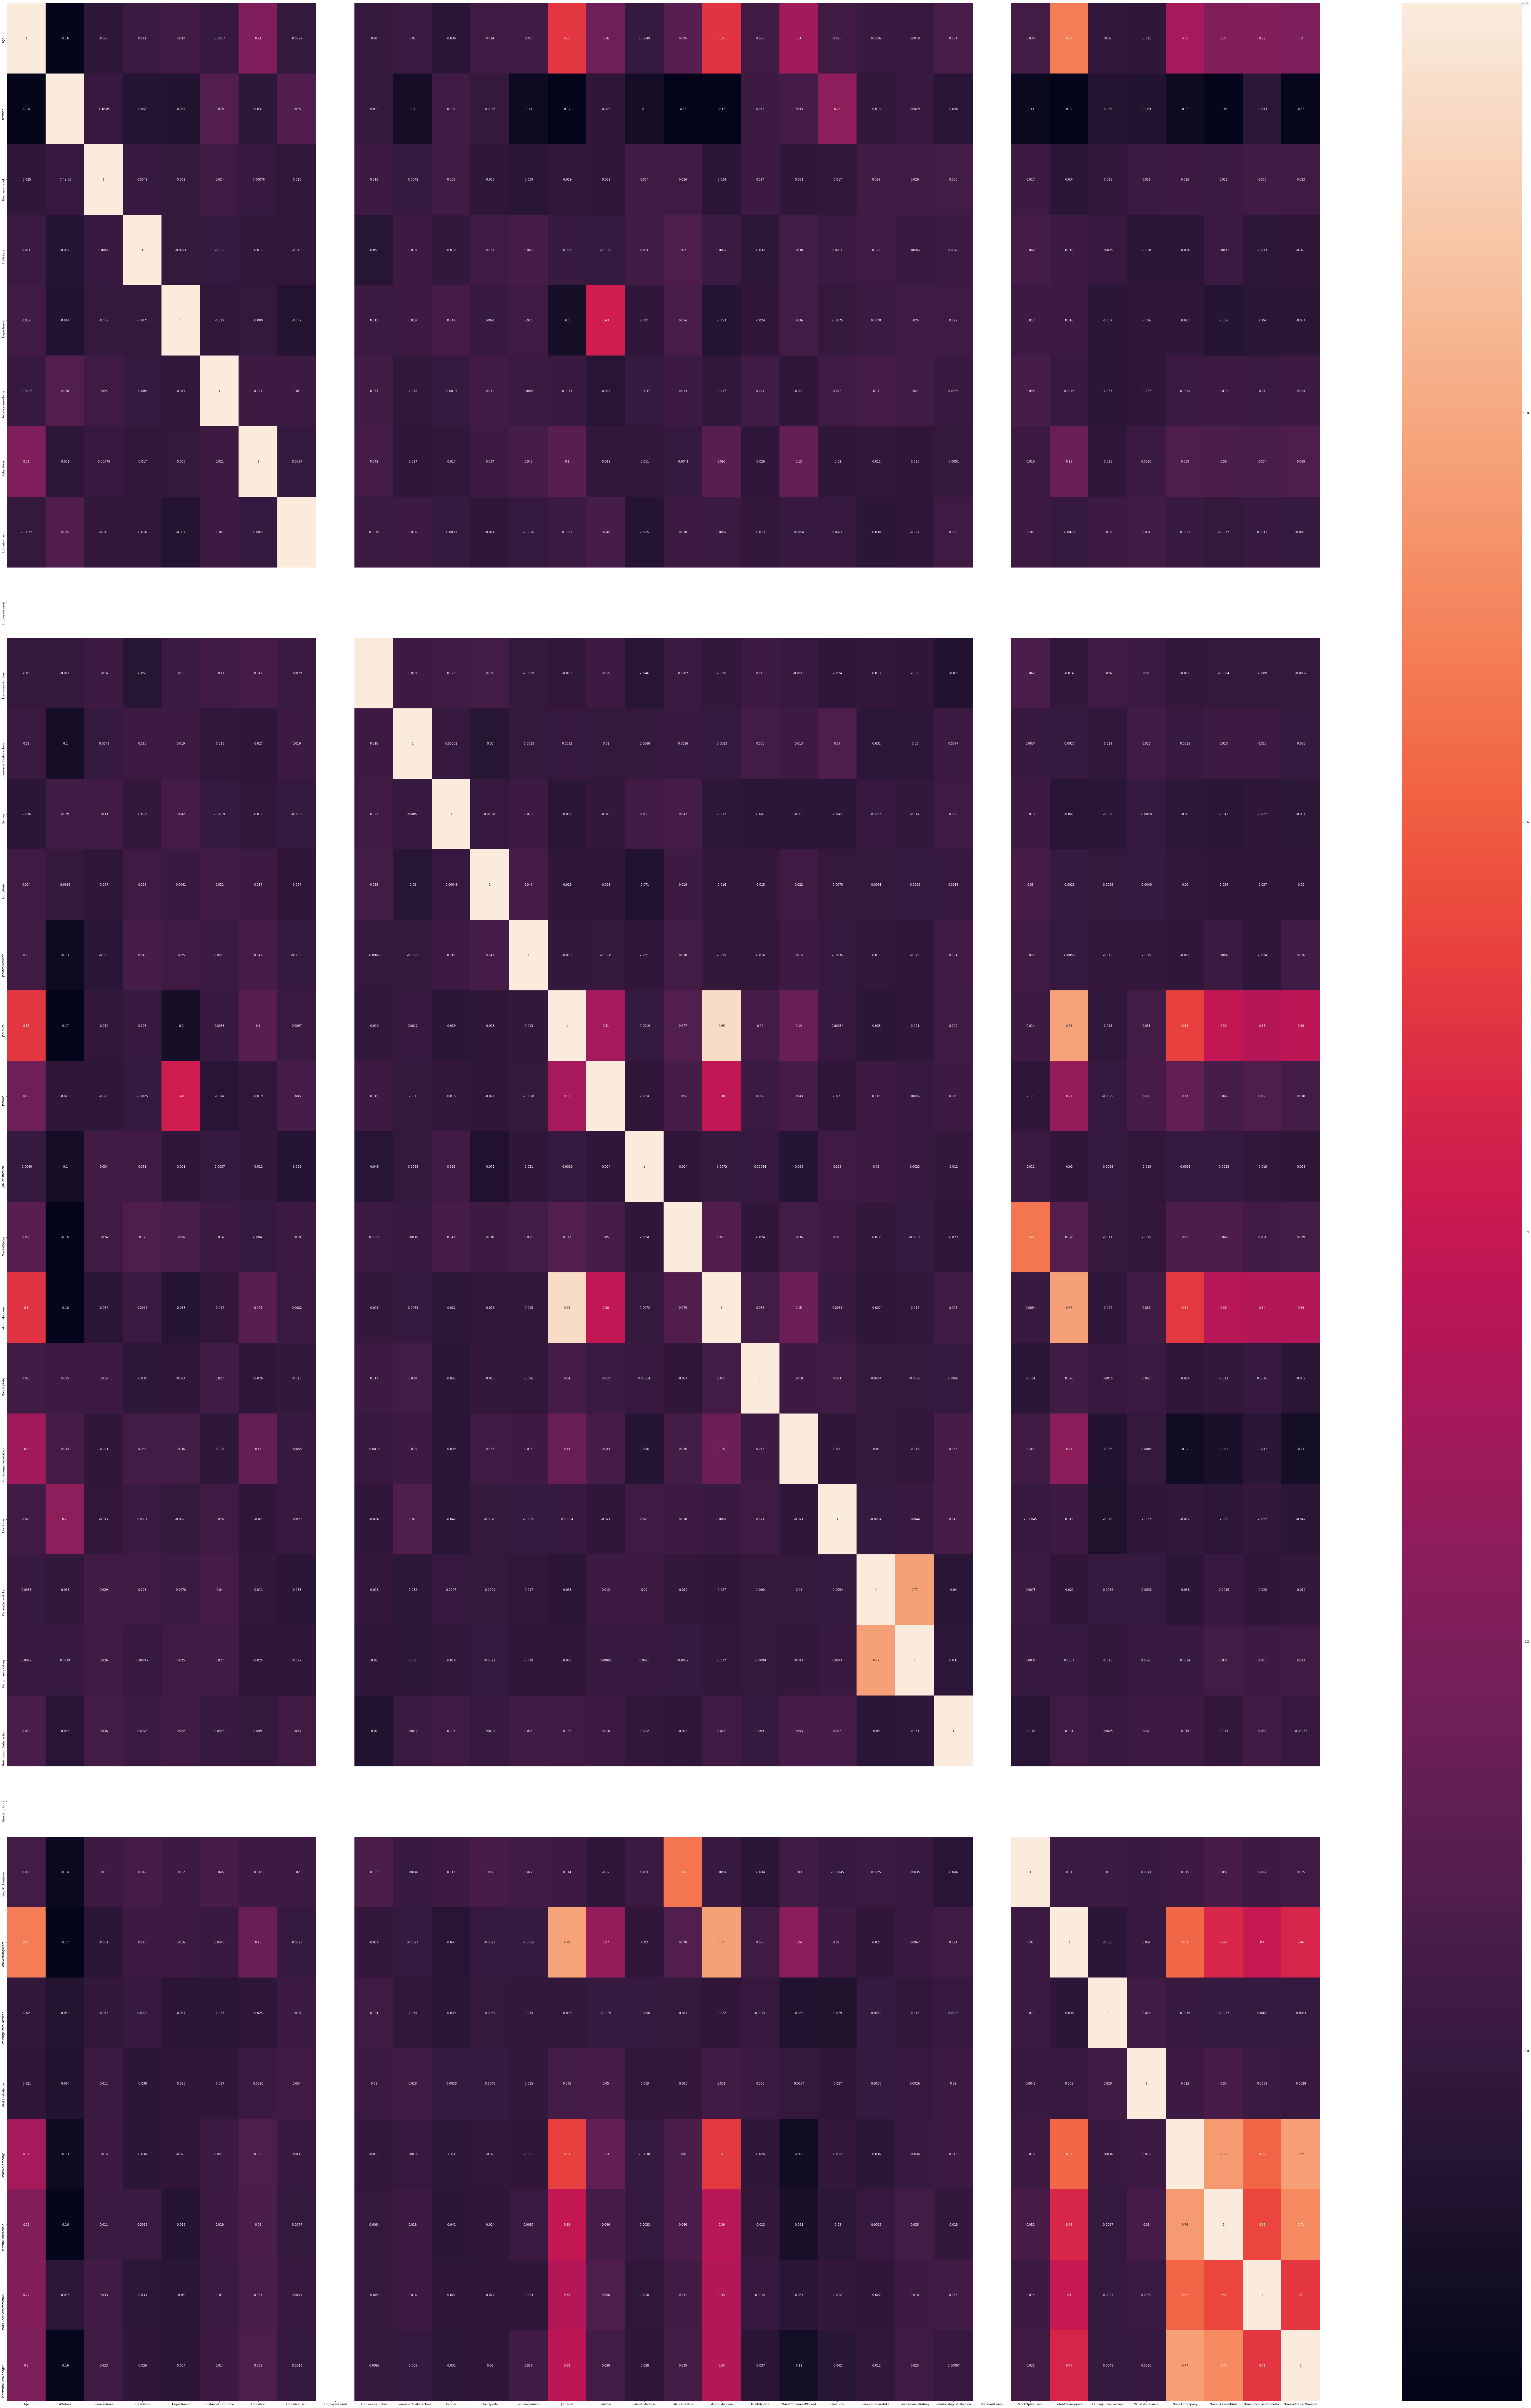

In [ ]:
#Visualization for correlation matrix
plt.figure(figsize=(100,150))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
#Correlation wrt target column
df.corr()['Attrition'].sort_values()

TotalWorkingYears          -0.171063
JobLevel                   -0.169105
MaritalStatus              -0.162070
YearsInCurrentRole         -0.160545
MonthlyIncome              -0.159840
Age                        -0.159205
YearsWithCurrManager       -0.156199
StockOptionLevel           -0.137145
YearsAtCompany             -0.134392
JobInvolvement             -0.130016
JobSatisfaction            -0.103481
EnvironmentSatisfaction    -0.103369
Department                 -0.063991
WorkLifeBalance            -0.063939
TrainingTimesLastYear      -0.059478
DailyRate                  -0.056652
RelationshipSatisfaction   -0.045872
YearsSinceLastPromotion    -0.033019
Education                  -0.031373
JobRole                    -0.027930
PercentSalaryHike          -0.013478
EmployeeNumber             -0.010577
HourlyRate                 -0.006846
BusinessTravel             -0.000074
PerformanceRating           0.002889
MonthlyRate                 0.015170
Gender                      0.029453
N

We clearly see that 'EmployeeCount', 'StandardHours' do not produce any correlation hence we can drop the columns. Also we drop the column 'Over18'.

In [ ]:
df = df.drop(columns=['EmployeeCount','StandardHours','Over18'])

In [ ]:
df.shape

(1470, 32)

# Outliers

In [ ]:
z = np.abs(zscore(df))

We take a zscore threshold of range(-3,3)

In [ ]:
df = df[(z<3).all(axis=1)]

In [ ]:
z.shape

(1470, 32)

In [ ]:
df.shape

(1387, 32)

In [ ]:
print("Percentage loss of data:\t", ((1470-1387)*100)/1470, "%")

Percentage loss of data:	 5.64625850340136 %


# Skewness

Now, we split the data into feature and target columns

In [ ]:
x = df.drop(columns='Attrition')
y = df['Attrition']

We treat for skewness to the feature variables

In [ ]:
x.skew()

Age                         0.472280
BusinessTravel              1.426774
DailyRate                  -0.017078
Department                 -0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.484586
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                     0.869228
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

In [ ]:
k = []
for i in x.columns:
    k.append(np.abs(x[i].skew()))

b=0
for i in x.columns:
    if k[b]>0.5:
        x[i] = yeojohnson(x[i])[0]
    b+=1

In [ ]:
x.skew()

Age                         0.472280
BusinessTravel              0.919330
DailyRate                  -0.017078
Department                 -0.183919
DistanceFromHome           -0.008149
Education                  -0.289024
EducationField              0.484586
EmployeeNumber              0.018931
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.018801
JobLevel                    0.110769
JobRole                    -0.015286
JobSatisfaction            -0.345612
MaritalStatus               0.160952
MonthlyIncome               0.027700
MonthlyRate                 0.030596
NumCompaniesWorked          0.016175
OverTime                    0.954751
PercentSalaryHike           0.112128
PerformanceRating           0.000000
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.089929
TotalWorkingYears          -0.009666
TrainingTimesLastYear       0.057949
WorkLifeBalance            -0.011133
Y

# Best Random State

In [ ]:
maxRS = 0
maxAcc = 0
for i in range(0,100):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    pred = lr.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAcc:
        maxAcc = acc
        maxRS = i
print("Max accuracy: \t", maxAcc)
print("Random State: \t", maxRS)

Max accuracy: 	 0.8884892086330936
Random State: 	 48


Now since we got the best random state for data modelling, we create the test train models

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=maxRS)

# Upsampling the Training Dataset

In [ ]:
U = pd.concat([x_train,y_train], axis=1) #Joining the train dataset

In [ ]:
no = U[U['Attrition']==0]
yes = U[U['Attrition']==1]

In [ ]:
upsample = resample(yes,
                    replace=True, #Sample with replacement
                    n_samples=len(no), #matching with the majority class
                    random_state=48) #Reproductible results

In [ ]:
new_U = pd.concat([no,upsample])

In [ ]:
new_U['Attrition'].value_counts()

0    911
1    911
Name: Attrition, dtype: int64

Splitting it back to x_train and y_train

In [ ]:
x_train = new_U.drop(columns='Attrition')
y_train = new_U['Attrition']

# Scaling data using Standard Scaler

In [ ]:
sc=StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

# Model Predictions

Logistic Regression

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)
pred = lr.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 53.956834532374096
[[125 122]
 [  6  25]]
              precision    recall  f1-score   support

           0       0.95      0.51      0.66       247
           1       0.17      0.81      0.28        31

    accuracy                           0.54       278
   macro avg       0.56      0.66      0.47       278
weighted avg       0.87      0.54      0.62       278



K-Nearest Neighbors

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
pred = knn.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 70.86330935251799
[[176  71]
 [ 10  21]]
              precision    recall  f1-score   support

           0       0.95      0.71      0.81       247
           1       0.23      0.68      0.34        31

    accuracy                           0.71       278
   macro avg       0.59      0.69      0.58       278
weighted avg       0.87      0.71      0.76       278



Support Vector Classifier

In [ ]:
svc = SVC()
svc.fit(x_train, y_train)
pred = svc.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 73.02158273381295
[[179  68]
 [  7  24]]
              precision    recall  f1-score   support

           0       0.96      0.72      0.83       247
           1       0.26      0.77      0.39        31

    accuracy                           0.73       278
   macro avg       0.61      0.75      0.61       278
weighted avg       0.88      0.73      0.78       278



Decision Tree Classifier

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred = dt.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 75.53956834532374
[[198  49]
 [ 19  12]]
              precision    recall  f1-score   support

           0       0.91      0.80      0.85       247
           1       0.20      0.39      0.26        31

    accuracy                           0.76       278
   macro avg       0.55      0.59      0.56       278
weighted avg       0.83      0.76      0.79       278



Random Forest Classifier

In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred = rf.predict(x_test)
print("Accuracy: \t", accuracy_score(y_test,pred)*100)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

Accuracy: 	 87.76978417266187
[[236  11]
 [ 23   8]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93       247
           1       0.42      0.26      0.32        31

    accuracy                           0.88       278
   macro avg       0.67      0.61      0.63       278
weighted avg       0.86      0.88      0.86       278



We see that the Random Forest Classifier gives the most efficiency

# Cross Validation

In [ ]:
scr1 = cross_val_score(lr, x, y, cv=5)
print("Cross validation score of Logistic Regression is: \t", scr1.mean())

Cross validation score of Logistic Regression is: 	 0.8406669610160247


In [ ]:
scr2 = cross_val_score(knn, x, y, cv=5)
print("Cross validation score of KNN is: \t", scr2.mean())

Cross validation score of KNN is: 	 0.8110900449315638


In [ ]:
scr3 = cross_val_score(svc, x, y, cv=5)
print("Cross validation score of SVC is: \t", scr3.mean())

Cross validation score of SVC is: 	 0.8348959821312626


In [ ]:
scr4 = cross_val_score(dt, x, y, cv=5)
print("Cross validation score of Decision Tree is: \t", scr4.mean())

Cross validation score of Decision Tree is: 	 0.7656831935173882


In [ ]:
scr5 = cross_val_score(rf, x, y, cv=5)
print("Cross validation score of Random Forest is: \t", scr5.mean())

Cross validation score of Random Forest is: 	 0.8550866166272757


We can see that 'Random Forest' performs the best among others

# Hyper Parameter Tuning

In [ ]:
GridSearchCV.get_params(rf)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
parameters = {'bootstrap': [True,False],
              'criterion': ('gini','entropy'),
              'max_depth': [10, 20, 30, 40, 50, None],
              'max_features': ['auto', 'sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [200, 400, 600, 800, 1000]}

In [ ]:
gcv = GridSearchCV(rf, parameters, cv=5, scoring='accuracy')

In [ ]:
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ('gini', 'entropy'),
                         'max_depth': [10, 20, 30, 40, 50, None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000]},
             scoring='accuracy')

In [ ]:
gcv.best_score_

0.983537558332079

In [ ]:
gcv.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_depth': 50,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

Let us put this value into the Randon Forest model and check the efficiency if increased

In [ ]:
RF = RandomForestClassifier(**gcv.best_params_)

In [ ]:
RF.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, criterion='entropy', max_depth=50,
                       min_samples_split=5, n_estimators=200)

In [ ]:
pred = RF.predict(x_test)
accuracy_score(y_test,pred)

0.8812949640287769

We see the accuracy has increased from 87% to 88%

# ROC AUC Plot

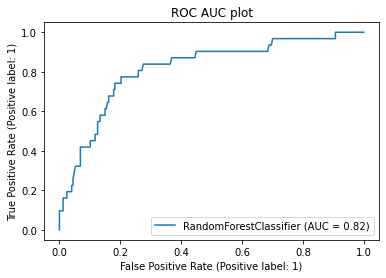

In [ ]:
plot_roc_curve(gcv.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

The AUC score of is very good

# Saving the best model

In [ ]:
joblib.dump(RF,"HR.pkl")

['HR.pkl']